## Predict Stress Level By Sleeping Hours

### Group 5 Member:

Vyos Devin (2501974776) Data Science, Binus University - vyos.devin@binus.ac.id

Lindawaty Veronica (2501972890) Data Science, Binus University - lindawaty.veronica@binus.ac.id

Tifara Beata Wibowo (2501975223) Data Science, Binus University - tifara.wibowo@binus.ac.id

Vina Nathania Santiko (2501960985) Data Science, Binus University - vina.santiko@binus.ac.id

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [55]:
data = pd.read_csv("https://raw.githubusercontent.com/Lindaaa0/Dataset/master/SaYoPillow.csv")
data

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [4]:
data.columns = ['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
                'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']

## Exploratory Data Analysis (EDA)

In [5]:
data.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

Tidak ada missing value pada tiap variabel/instances

In [6]:
data.describe()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


## Data Visualization

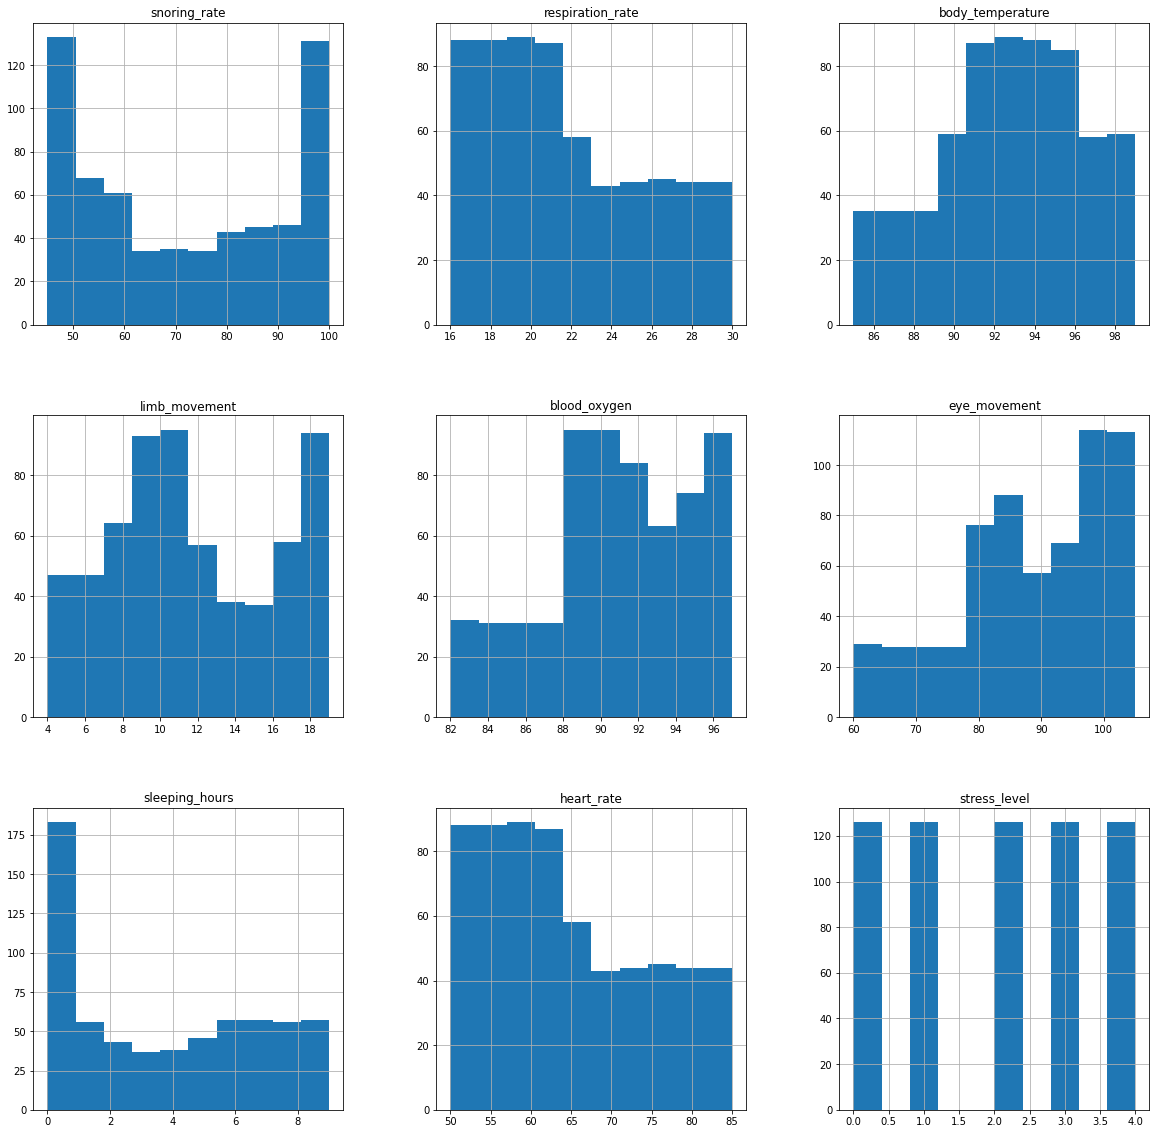

In [7]:
dist = data.hist(figsize = (20, 20))

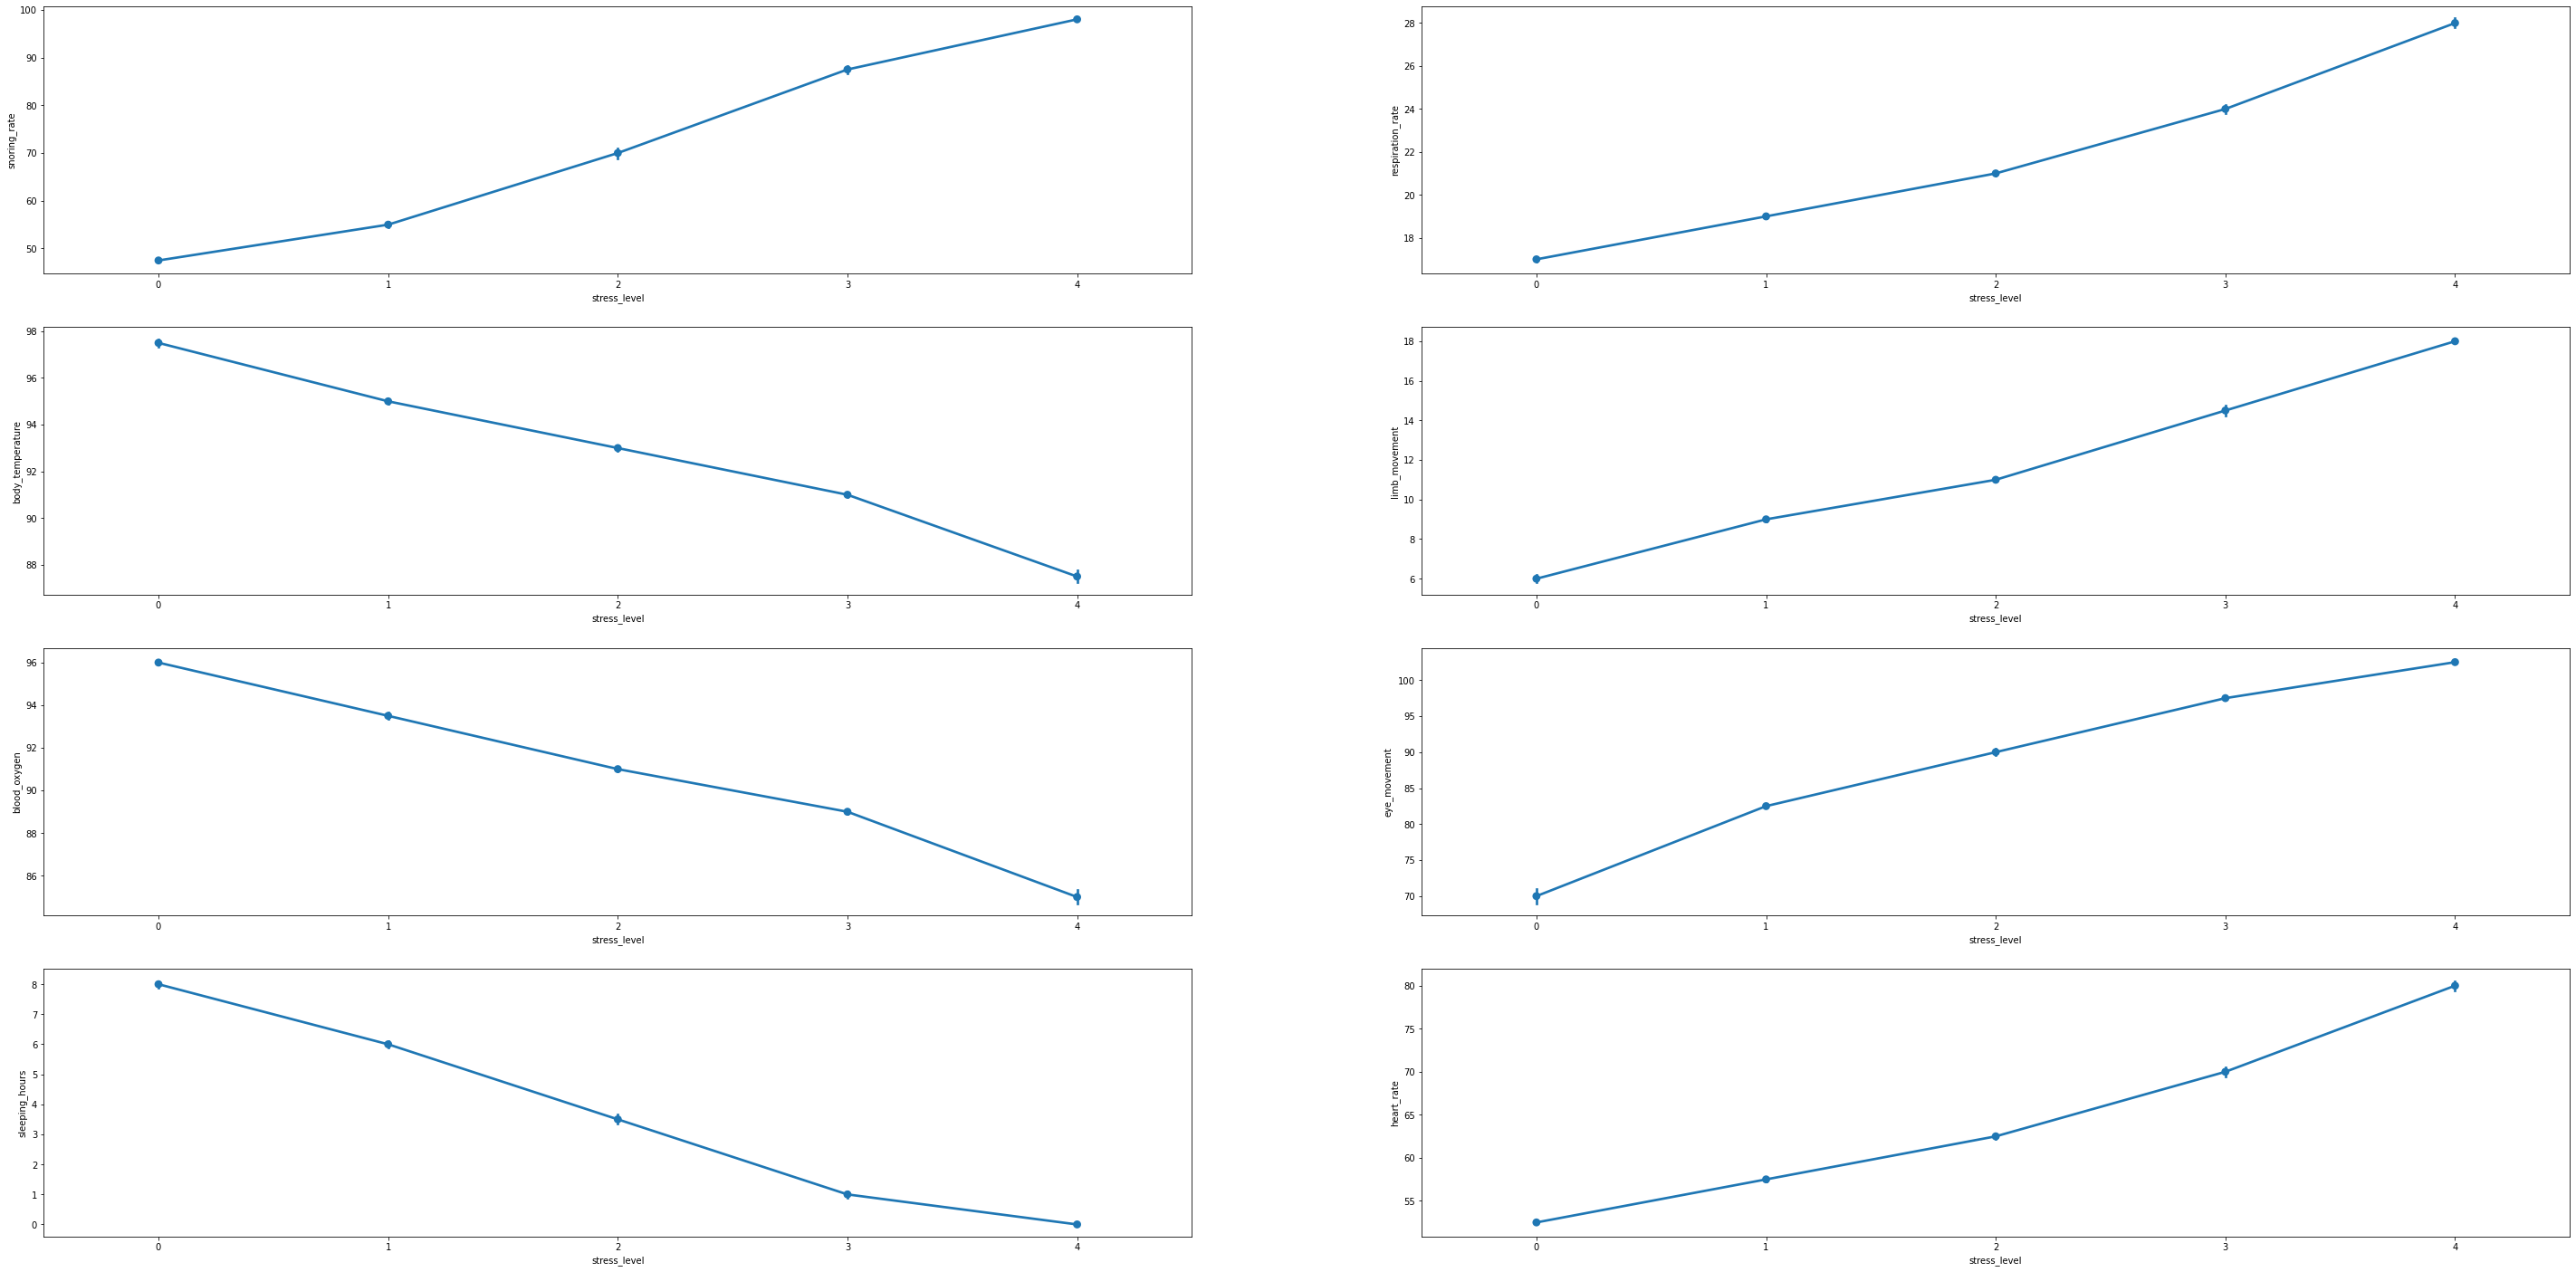

In [8]:
fig = plt.figure(figsize=(50, 25))
rows = 4
columns = 2
for i in range(len(data.columns[:-1])):
  fig.add_subplot(rows, columns, (i+1))
  img = sns.pointplot(x='stress_level',y=data.columns[i],data=data)
plt.show()

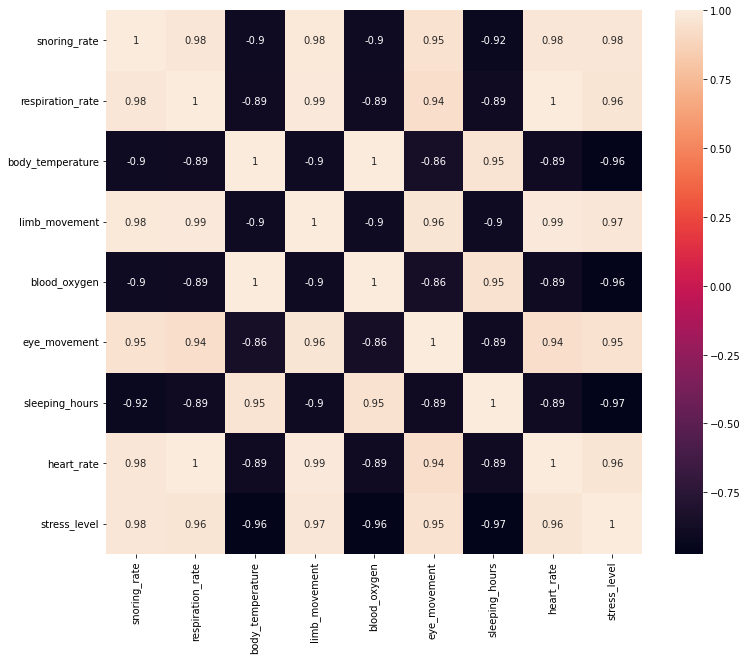

In [9]:
plt.figure(figsize = (12, 10))
p = sns.heatmap(data.corr(), annot = True)

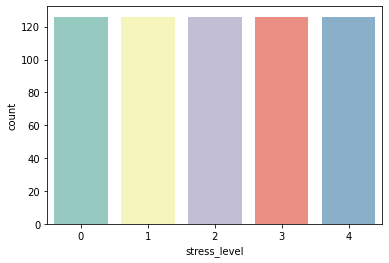

In [10]:
sns.countplot(x="stress_level", data = data, palette = "Set3")
plt.show()

## Scaling Data

In [11]:
#dropping dependent variable
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(data.drop(["stress_level"],axis = 1),), columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
                'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate'])
X.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636


In [12]:
#assigning target variable
y = data.stress_level
y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: stress_level, Length: 630, dtype: int64

## Model Building

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Decision Tree

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predict = dt.predict(X_test)
print("Confusion Matrix")
print("=================")
print(confusion_matrix(y_test, predict), "\n")

print("Classification Report")
print("=======================")
print(classification_report(y_test, predict))

Confusion Matrix
[[23  0  0  0  0]
 [ 1 23  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



>1, train: 0.407, test: 0.365
>2, train: 0.607, test: 0.556
>3, train: 0.806, test: 0.754
>4, train: 1.000, test: 0.976
>5, train: 1.000, test: 0.984
>6, train: 1.000, test: 0.984
>7, train: 1.000, test: 0.984
>8, train: 1.000, test: 0.984
>9, train: 1.000, test: 0.984
>10, train: 1.000, test: 0.984
>11, train: 1.000, test: 0.976
>12, train: 1.000, test: 0.976
>13, train: 1.000, test: 0.984
>14, train: 1.000, test: 0.984
>15, train: 1.000, test: 0.984
>16, train: 1.000, test: 0.984
>17, train: 1.000, test: 0.984
>18, train: 1.000, test: 0.984
>19, train: 1.000, test: 0.984
>20, train: 1.000, test: 0.984


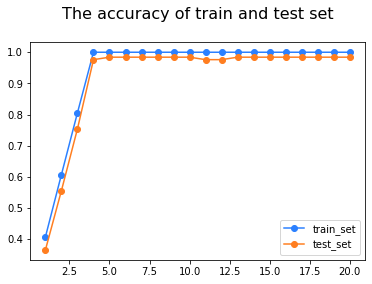

In [45]:
train_scores, test_scores = list(), list()

values = [i for i in range (1, 21)]
for i in values:
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

    # plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='train_set', color = '#2B80FF')
plt.plot(values, test_scores, '-o', label='test_set', color = '#ff7e20')
plt.legend()
plt.title("The accuracy of train and test set\n", fontsize = 16)
plt.show()

## SVM

In [16]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[16  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         9

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


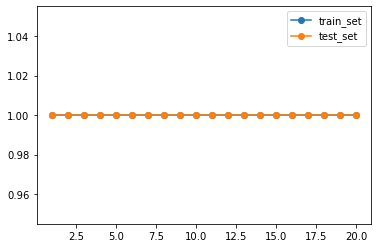

In [17]:
train_scores, test_scores = list(), list()

values = [i for i in range (1, 21)]
for i in values:
    model = SVC()
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

    # plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='train_set')
plt.plot(values, test_scores, '-o', label='test_set')
plt.legend()
plt.show()

## KNN

In [18]:
knn = KNeighborsClassifier()
knnModel = knn.fit(X_train, y_train)
knnPred = knn.predict(X_train)
print(confusion_matrix(y_train, knnPred))
print(classification_report(y_train, knnPred))


knnPred = knn.predict(X_test)
print(confusion_matrix(y_test, knnPred))
print(classification_report(y_test, knnPred))

[[110   0   0   0   0]
 [  0 116   0   0   0]
 [  0   0 112   0   0]
 [  0   0   0 112   0]
 [  0   0   0   0 117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       116
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00       112
           4       1.00      1.00      1.00       117

    accuracy                           1.00       567
   macro avg       1.00      1.00      1.00       567
weighted avg       1.00      1.00      1.00       567

[[16  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00

>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000
>31, train: 1.000, test: 1.000
>32, train: 1.000, test: 1.000
>33, train: 1.000

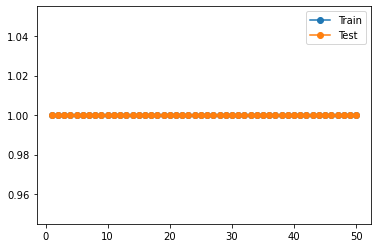

In [19]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## Voting Classifier

In [22]:
estimators =[('svm', svc_model), ('KNN', knn), ('DecisionTree', dt)]

ensemble = VotingClassifier(estimators, voting = 'hard')

ensembleModel = ensemble.fit(X_train, y_train)

ensemblePred = ensemble.predict(X_test)
print(classification_report(y_test, ensemblePred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         9

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000
>31, train: 1.000, test: 1.000
>32, train: 1.000, test: 1.000
>33, train: 1.000

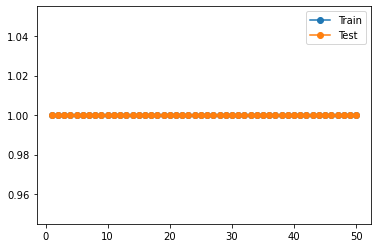

In [23]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    model = ensemble
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## Bagging

In [20]:
start = time.time()
param_dist = {'max_depth' :[2,3,4],
             'bootstrap': [True, False],
             'max_features': ['auto', 'sqrt', 'log2', None],
             'criterion': ['gini', 'entropy']}

fit_rf = RandomForestClassifier()
cv_rf = GridSearchCV(fit_rf, cv = 10, param_grid = param_dist, n_jobs = 3)

rfModel = cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto'}
Time taken in grid search:  61.92


In [21]:
rfPred = cv_rf.predict(X_test)
print(classification_report(y_test, rfPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14
           3       1.00      0.93      0.96        14
           4       0.90      1.00      0.95         9

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.96        63
weighted avg       0.97      0.97      0.97        63



In [27]:
rfPred = cv_rf.predict(X_train)
print(classification_report(y_train, rfPred))

rfPred = cv_rf.predict(X_test)
print(classification_report(y_test, rfPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       116
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00       112
           4       1.00      1.00      1.00       117

    accuracy                           1.00       567
   macro avg       1.00      1.00      1.00       567
weighted avg       1.00      1.00      1.00       567

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        14
           3       1.00      0.93      0.96        14
           4       0.90      1.00      0.95         9

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



>1, train: 1.000, test: 0.968
>2, train: 1.000, test: 0.968
>3, train: 1.000, test: 0.968
>4, train: 1.000, test: 0.968
>5, train: 1.000, test: 0.968
>6, train: 1.000, test: 0.968
>7, train: 1.000, test: 0.968
>8, train: 1.000, test: 0.968
>9, train: 1.000, test: 0.968
>10, train: 1.000, test: 0.968
>11, train: 1.000, test: 0.968
>12, train: 1.000, test: 0.968
>13, train: 1.000, test: 0.968
>14, train: 1.000, test: 0.968
>15, train: 1.000, test: 0.968
>16, train: 1.000, test: 0.968
>17, train: 1.000, test: 0.968
>18, train: 1.000, test: 0.968
>19, train: 1.000, test: 0.968
>20, train: 1.000, test: 0.968


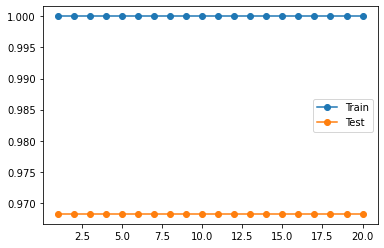

In [25]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
    model = cv_rf
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()